**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?  **(1460 rows, 81 columns)**
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [4]:
data = '../data/train.csv'
df = pd.read_csv(data)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [5]:
df.shape

(1460, 81)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.set_index('Id', inplace = True)  #change the index inplace

In [8]:
df.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? 

Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [10]:

#changing MSSubClass to object below. NO reason for it to be type(int)
df['MSSubClass'] = df['MSSubClass'].astype(object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

### B. Plot histograms of the numeric columns. 

In [16]:
len(numeric_columns)

36

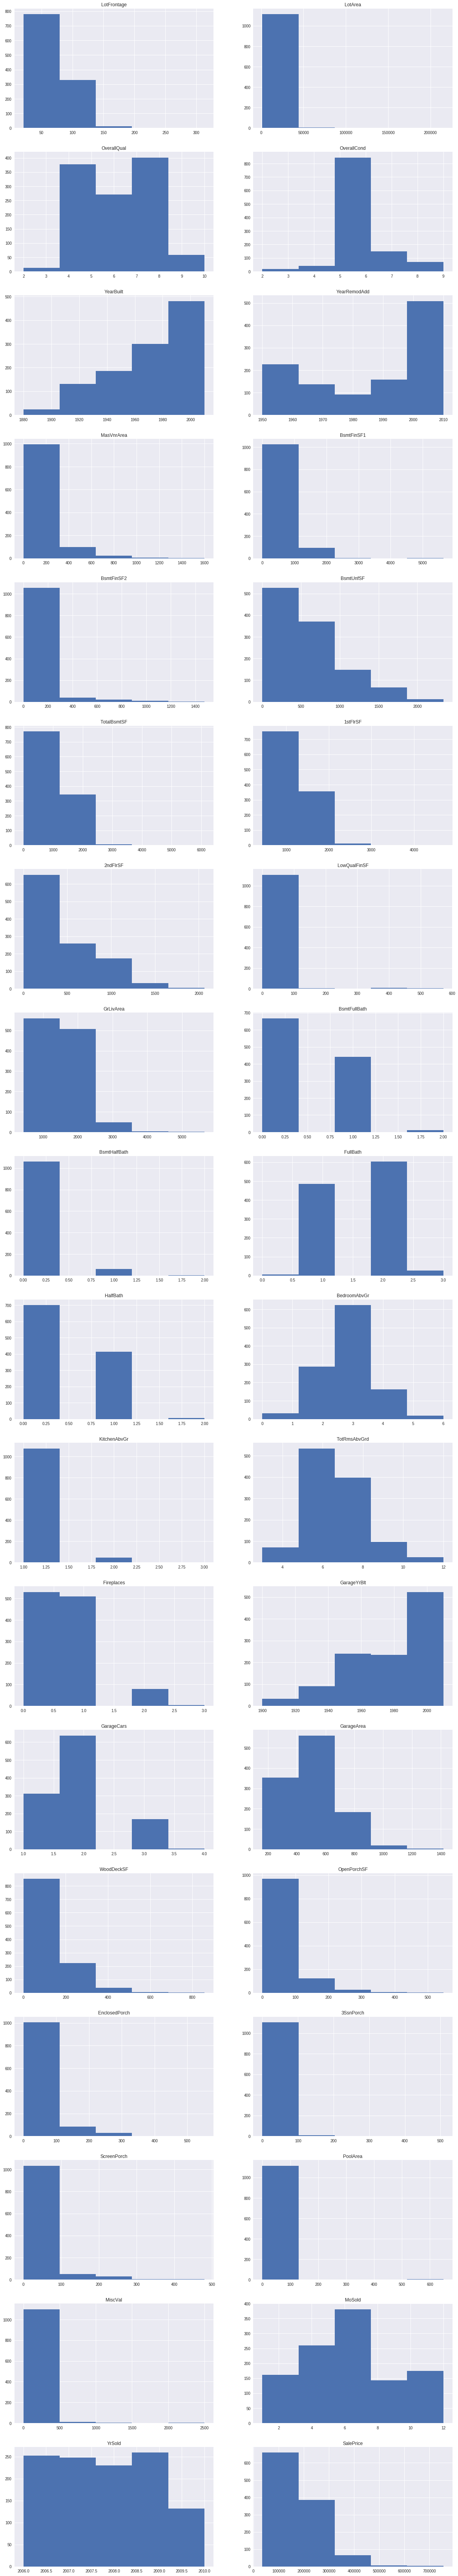

In [15]:

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()  
###creating numeric_columns list based on dtype=np.number 
# numeric_columns

df1 = df.dropna(subset=numeric_columns)  #had to remove the np.nan values!!!!!!
### histograms did not like the NaN values
# df1 

fig = plt.figure(figsize=(20,120))
for i, col in enumerate(numeric_columns):

    
    fig.add_subplot(18,2,i+1)
    col_data = df1[col]

    plt.hist(col_data, bins=5)
    plt.title(col)

In [ ]:
df1.info()

#### What are your observations? Add them to this markdown cell.

---1. Histograms do not work with NaN values!!!

---2. Some categories have outliers which skew the usefulness of histograms



### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

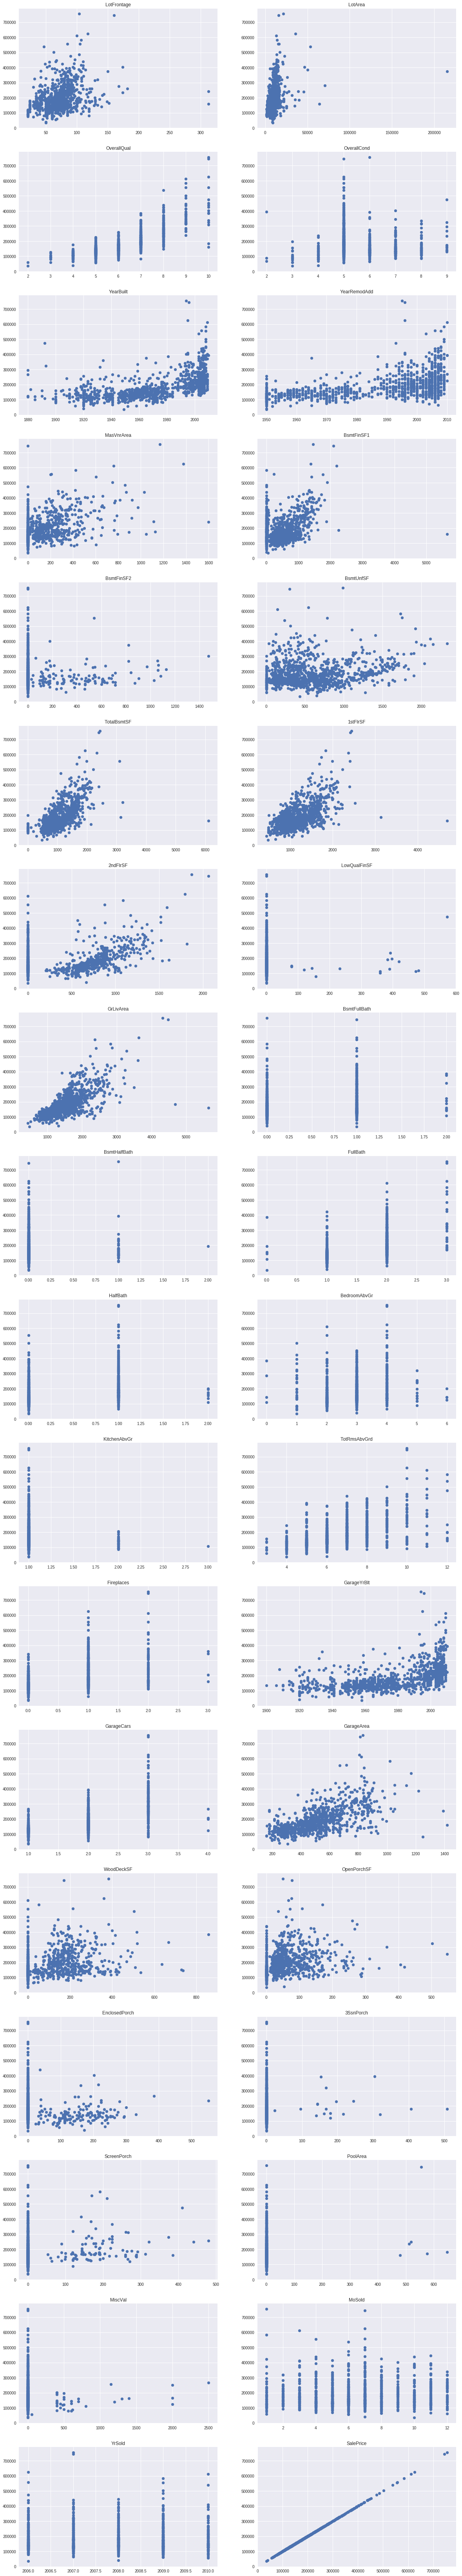

In [17]:
fig = plt.figure(figsize=(20,120))
for i, col in enumerate(numeric_columns):

    
    fig.add_subplot(18,2,i+1)
    col_data = df1[col]

    plt.scatter(col_data, df1['SalePrice'])
    plt.title(col)

#### What are your observations? Add them to this markdown cell.

---1.  You can see the outliers much more clearly in the scatter plot.

---2.  Integer dtype columns are better served with histograms.

---3.  Float dtype columns are best served with scatter plots.

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()  
# len(categorical_columns)
categorical_columns.append('SalePrice')
df_categorical = df1[categorical_columns]
# df_categorical.info()

for i in df_categorical:
    print(df_categorical[i].unique())



[60 20 70 50 190 45 90 120 30 80 160 75 180 40 85]
['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'SawyerW' 'NAmes' 'IDOTRR' 'MeadowV' 'Timber'
 'StoneBr' 'ClearCr' 'Gilbert' 'Edwards' 'NWAmes' 'NPkVill' 'Blmngtn'
 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin' 'SFoyer']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']
['CompShg' 'WdShngl' 'Membran' 'WdShake' 'Tar&Grv' 'Roll' 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'BrkFace' 'HdBoard' 'WdShing' 'CemntBd'
 'Stucco' 'Plywood' 'AsbShng' 'BrkComm' 'Stone' 'ImStucc' 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shn

In [19]:
cat_columns_list = df_categorical.columns
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 1 to 1460
Data columns (total 45 columns):
MSSubClass       1121 non-null object
MSZoning         1121 non-null object
Street           1121 non-null object
Alley            77 non-null object
LotShape         1121 non-null object
LandContour      1121 non-null object
Utilities        1121 non-null object
LotConfig        1121 non-null object
LandSlope        1121 non-null object
Neighborhood     1121 non-null object
Condition1       1121 non-null object
Condition2       1121 non-null object
BldgType         1121 non-null object
HouseStyle       1121 non-null object
RoofStyle        1121 non-null object
RoofMatl         1121 non-null object
Exterior1st      1121 non-null object
Exterior2nd      1121 non-null object
MasVnrType       1121 non-null object
ExterQual        1121 non-null object
ExterCond        1121 non-null object
Foundation       1121 non-null object
BsmtQual         1097 non-null object
BsmtCond         1097

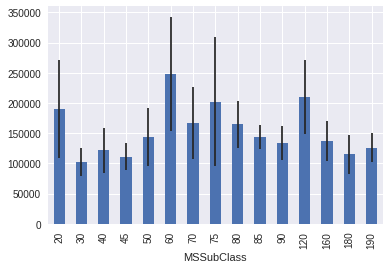

In [20]:

test = df_categorical.groupby('MSSubClass')['SalePrice'].std()
df_categorical.groupby('MSSubClass')['SalePrice'].mean().plot.bar(yerr=test)



In [21]:
errors = df_categorical.groupby(col)['SalePrice'].std()


In [263]:
df_categorical.shape

(1121, 45)

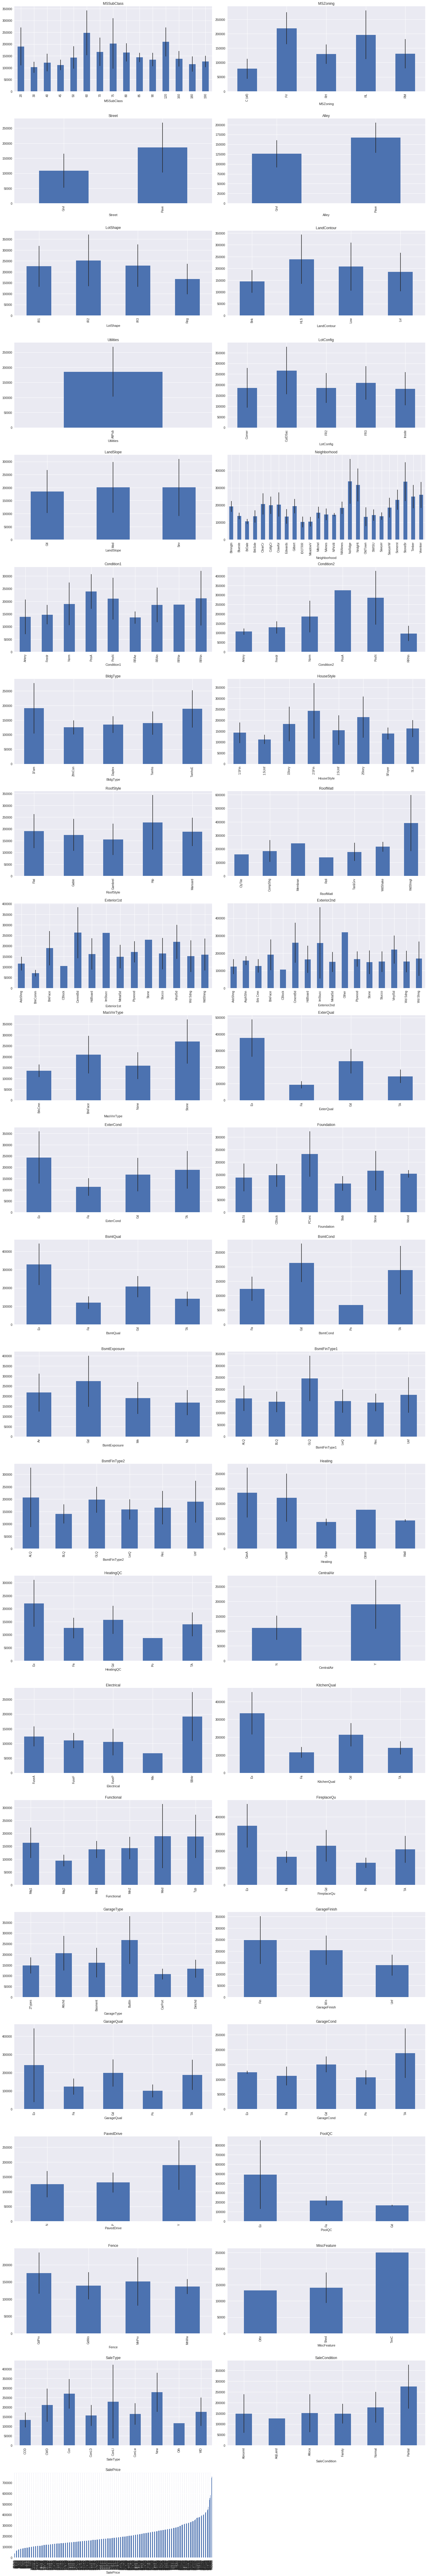

In [267]:


fig = plt.figure(figsize=(20,120))

# df1.plot.bar(x=df1['CentralAir'], y='SalePrice')


for i, col in enumerate(df_categorical):  #trying to iterate through each column

    
    fig.add_subplot(23,2, i+1)
#     col_data = df_categorical[col].groupby

    df_categorical.groupby(col)['SalePrice'].mean().plot.bar(yerr=df_categorical.groupby(col)['SalePrice'].std())
    plt.title(col)

plt.tight_layout()    
plt.show()

#### What are your observations? Add them to this markdown cell.

---



## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?  1.5 times the lower IQR range results in a negative value.1.5 times above results in only 50 occurances.
* Use masking to remove the outliers as you've defined them.

(19581.891337482666, 434392.54434970819)

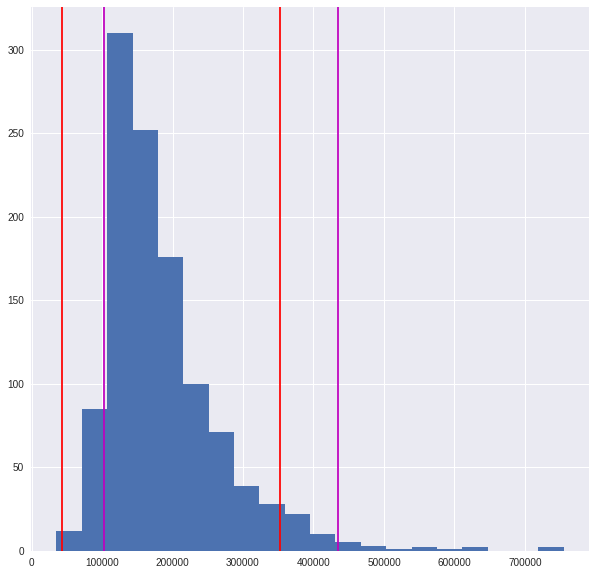

In [28]:
fig = plt.figure(figsize=(10,10))
plt.hist(df1['SalePrice'], bins=20)

plt.axvline(upper_fence, label='upper_fence', color='r')
plt.axvline(lower_fence, label='lower_fence', color='r')
plt.axvline(np.mean(df1['SalePrice'])+3*np.std(df1['SalePrice']), label='upper_upper_fence', color='m')
plt.axvline(np.mean(df1['SalePrice'])-1*np.std(df1['SalePrice']), label='upper_upper_fence', color='m')
np.mean(df1['SalePrice'])-2*np.std(df1['SalePrice']), np.mean(df1['SalePrice'])+3*np.std(df1['SalePrice'])

###purple line on the upper side is .mean() # 3*std()
###red line on upper side is max_iqr range.
######purple line on minimum side is mean() - 2*std()
###purple line on minimum side is lower_iqr range

In [24]:
df1['SalePrice'].mean(), df1['SalePrice'].std()

(185506.15254237287, 82999.159004468413)

In [25]:
###Tukey's method for outline detection states that anything more than 1.5 * the interquartile range above or below 
###the median is an outlier. Find outliers using this method!

first_quartile = np.percentile(df1['SalePrice'], 25)
third_quartile = np.percentile(df1['SalePrice'], 75)

first_quartile, third_quartile



(131000.0, 219500.0)

In [26]:
iqr = third_quartile - first_quartile

lower_fence = first_quartile - 1.0*iqr
upper_fence = third_quartile + 1.5*iqr
below_iqr = (df1['SalePrice'] < lower_fence)
above_iqr = (df1['SalePrice'] > upper_fence)

###all in all, Tukeys is not ideal.  The lower fence is below 0 for 1.5*iqr

# df['outliers'] = df["SalePrice"] > upper_fence and df['SalePrice'] < lower_fence


iqr, lower_fence, upper_fence, below_iqr.sum(), above_iqr.sum(), df1['SalePrice'].min()

(88500.0, 42500.0, 352250.0, 2, 50, 35311)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1121 non-null object
MSZoning         1121 non-null object
LotFrontage      1121 non-null float64
LotArea          1121 non-null int64
Street           1121 non-null object
Alley            77 non-null object
LotShape         1121 non-null object
LandContour      1121 non-null object
Utilities        1121 non-null object
LotConfig        1121 non-null object
LandSlope        1121 non-null object
Neighborhood     1121 non-null object
Condition1       1121 non-null object
Condition2       1121 non-null object
BldgType         1121 non-null object
HouseStyle       1121 non-null object
OverallQual      1121 non-null int64
OverallCond      1121 non-null int64
YearBuilt        1121 non-null int64
YearRemodAdd     1121 non-null int64
RoofStyle        1121 non-null object
RoofMatl         1121 non-null object
Exterior1st      1121 non-null object
Exterior2nd      1121 non

In [29]:
# df_no_outliers = df1.loc[(df1['SalePrice'] < lower_fence) & (df1['SalePrice'] > upper_fence)]
# df_no_outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.0*iqr
    fence_high = q3+1.5*iqr
    df_no_outliers = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_no_outliers

df_no_outliers = remove_outlier(df, 'SalePrice')
df1_no_outliers = remove_outlier(df1, 'SalePrice')

In [30]:
df1_no_outliers.info()   #final dataframe with no_outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1069 non-null object
MSZoning         1069 non-null object
LotFrontage      1069 non-null float64
LotArea          1069 non-null int64
Street           1069 non-null object
Alley            76 non-null object
LotShape         1069 non-null object
LandContour      1069 non-null object
Utilities        1069 non-null object
LotConfig        1069 non-null object
LandSlope        1069 non-null object
Neighborhood     1069 non-null object
Condition1       1069 non-null object
Condition2       1069 non-null object
BldgType         1069 non-null object
HouseStyle       1069 non-null object
OverallQual      1069 non-null int64
OverallCond      1069 non-null int64
YearBuilt        1069 non-null int64
YearRemodAdd     1069 non-null int64
RoofStyle        1069 non-null object
RoofMatl         1069 non-null object
Exterior1st      1069 non-null object
Exterior2nd      1069 non

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [31]:
df1.isnull().sum()
# Alley(993)  NA 	No alley access
# BsmtQual(24)  NA	No Basement
# BsmtCond    (24)     NA	No Basement
# BsmtExposure   (25)  NA	No Basement
# BsmtFinType1    (25) NA	No Basement
# BsmtFinType2     (25) NA	No Basement
# FireplaceQ (528)  NA	No Fireplace
# PoolQC  (1064)  NA	No Pool
# Fence   (857)  NA	No Fence
# MiscFeature (1033)  NA	None

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1044
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           24
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       530
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive

In [32]:

nan_columns = df1_no_outliers.loc[:, df.isnull().any()]  #looks at all rows
# df_nan = df1_no_outliers[nan_columns]
nan_columns

# df_nan.fillna(0)
# null_columns = df1_no_outliers.select_dtypes(include=[None]).columns.tolist()  
# ###creating null_columns list based on dtype=np.number 
# null_columns

# df1_no_outliers.contains('na')

###SEE 00 - How to work with pandas for replacing null with the median

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
Id,,,,,,,,,,,,,,,,,,,
1,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
2,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
3,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
4,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
5,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
6,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
7,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
9,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
10,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


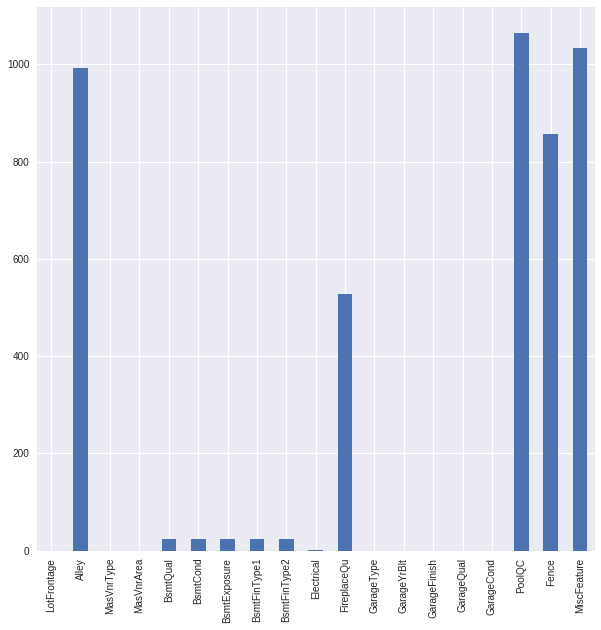

In [272]:
nan_columns.isnull().sum().plot.bar(figsize=(10,10))

# df1_no_outliers.groupby('MSSubClass')['SalePrice'].mean().plot.bar(yerr=test)

In [34]:
nan_filled = nan_columns.fillna(0)


In [35]:
nan_filled.isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

Verify that you have *truly* eliminated all the null values!

In [ ]:
df1_no_outliers

In [36]:
nan_filled


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
Id,,,,,,,,,,,,,,,,,,,
1,65.0,0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,0,Attchd,2003.0,RFn,TA,TA,0,0,0
2,80.0,0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,0,0,0
3,68.0,0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,0,0,0
4,60.0,0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,0,0,0
5,84.0,0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,0,0,0
6,85.0,0,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,0,Attchd,1993.0,Unf,TA,TA,0,MnPrv,Shed
7,75.0,0,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,0,0,0
9,51.0,0,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,0,0,0
10,50.0,0,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,0,0,0


### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [37]:
cat_columns_list2 = cat_columns_list.drop('SalePrice')

In [38]:
len(cat_columns_list2), cat_columns_list2

(44,
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
        'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
       dtype='object'))

In [39]:
### creating dummies from the no_outliers DF
df_with_dummies = pd.get_dummies(df1_no_outliers, columns = cat_columns_list2)  

###created df1_no_outliers_noSalePrice below to remove 'SalePrice' from the dataframe.  Unsure if its needed

In [40]:
df_with_dummies.info()  #checking info.  retuurns 293 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 1 to 1460
Columns: 293 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(257)
memory usage: 577.3 KB


In [41]:
df_with_dummies.isnull().any().sum()  #checking for any null() values anywhere in this new DF

###return 0 null values

0

In [ ]:
# df1_no_outliers['SalePrice']   #must remove 'SalePrice'
# df1_no_outliers_noSalePrice = df1_no_outliers.drop('SalePrice', axis=1)
# df1_no_outliers_noSalePrice

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?  We want to test the test set against the trained set for correlations.  First up is 50% train / 50% test

In [42]:
from sklearn.model_selection import train_test_split

In [76]:
seed = 42
target = df_with_dummies['SalePrice']
X = df_with_dummies.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,  #X
                                                    target,        #Y
                                                    test_size = .3,  #setting 50% of values for test, inititally
                                                    random_state = seed)

###setting train-test-split variables

In [77]:
for dataset in X_train, X_test, y_train, y_test:
    print(dataset.shape)  ###just to see the shape

(748, 292)
(321, 292)
(748,)
(321,)


We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [45]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler() #creates mean=0 and std dev=1 for each column

X_train_scaled = scaler.fit_transform(X_train) ##just finds the mean and std dev of each column & transforms
X_test_scaled = scaler.transform(X_test)

In [79]:
X_train_scaled  ###just checking to make sure the data scaled

array([[-0.37566623, -0.4341999 , -0.0978588 , ..., -0.12216944,
         0.46716276, -0.32885886],
       [ 1.04374134,  0.32560159,  0.68922057, ..., -0.12216944,
         0.46716276, -0.32885886],
       [ 1.1768108 ,  0.45644097, -0.88493817, ..., -0.12216944,
        -2.14058159, -0.32885886],
       ..., 
       [ 0.46710701,  0.12139036, -0.0978588 , ..., -0.12216944,
         0.46716276, -0.32885886],
       [ 0.5114635 ,  0.2797972 ,  0.68922057, ..., -0.12216944,
         0.46716276, -0.32885886],
       [ 0.68888945,  0.22338995,  1.47629994, ..., -0.12216944,
         0.46716276, -0.32885886]])

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [51]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [14]:
### already prvided below

example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

example_results

[{'dataset': 'train',
  'name': 'test1',
  'preprocessing': 'raw',
  'score': '1 bajillion'},
 {'dataset': 'train',
  'name': 'test1',
  'preprocessing': 'scaled',
  'score': '20 bajillion'}]

Then we pass the results list to pass to a DataFrame.

In [52]:
pd.DataFrame(example_results)


,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [129]:
results = list()
results   ###only run theis cell to clear the Results list###

[]

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [130]:
benchmark_raw = LinearRegression() #instantiate

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [161]:
X_train.shape

(748, 292)

In [131]:
benchmark_raw.fit(X_train, y_train) #fitting the model with training scores
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

In [132]:
results  ###tells us the linear regression testing metric was BAD!!!
###training set worked fine, as expected
###we have many useless features for our target data

[{'dataset': 'train',
  'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  'name': 'benchmark',
  'preprocessing': 'raw',
  'score': 0.95242683237386117},
 {'dataset': 'test',
  'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  'name': 'benchmark',
  'preprocessing': 'raw',
  'score': -14446457478.888329}]

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [133]:
ss_lr = StandardScaler() ###set up a new scaler
X_train_scaled_lr = ss_lr.fit_transform(X_train)
X_test_scaled_lr = ss_lr.transform(X_test)




In [134]:
benchmark_scaled = LinearRegression() ##instantiate a new LR model...

In [135]:
benchmark_scaled.fit(X_train_scaled_lr, y_train) ### ... with scaled data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
benchmark_scaled_train_score = benchmark_raw.score(X_train_scaled_lr, y_train)
benchmark_scaled_test_score = benchmark_raw.score(X_test_scaled_lr, y_test)

###no need to scale the target data?
###this should throw off the scores, correct?

results.append({'name':'benchmark_scaled',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': benchmark_scaled_train_score})
results.append({'name':'benchmark_scaled',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': benchmark_scaled_test_score})

In [137]:
results

[{'dataset': 'train',
  'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  'name': 'benchmark',
  'preprocessing': 'raw',
  'score': 0.95242683237386117},
 {'dataset': 'test',
  'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  'name': 'benchmark',
  'preprocessing': 'raw',
  'score': -14446457478.888329},
 {'dataset': 'train',
  'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  'name': 'benchmark_scaled',
  'preprocessing': 'scaled',
  'score': -10954729582749736.0},
 {'dataset': 'test',
  'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  'name': 'benchmark_scaled',
  'preprocessing': 'scaled',
  'score': -11263521597077856.0}]

Use a DataFrame to display your results.

In [138]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.524268e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-1.444646e+10
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.095473e+16
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.126352e+16


#### What are your observations? Add them to this markdown cell.

---First I noticed how poor the testing model performed

---Secondly, I noticed how poorly the scaled training model peformed.  It must be because the y(targets) are not scaled?


### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [139]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [140]:
ridge_raw=Ridge() ##instantiate

In [141]:
ridge_raw.fit(X_train, y_train)
ridge_raw_train_score = ridge_raw.score(X_train, y_train)
ridge_raw_test_score = ridge_raw.score(X_test, y_test)

results.append({'name':'Ridge',
                'model':ridge_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_raw_train_score})
results.append({'name':'Ridge',
                'model':ridge_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_raw_test_score})



In [142]:
lasso_raw = Lasso() #instantiate

In [143]:
lasso_raw.fit(X_train, y_train)
lasso_raw_train_score = lasso_raw.score(X_train, y_train)
lasso_raw_test_score = lasso_raw.score(X_test, y_test)

results.append({'name':'Lasso',
                'model':lasso_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_raw_train_score})
results.append({'name':'Lasso',
                'model':lasso_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_raw_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [144]:
elastic_raw = ElasticNet() #instantiate

In [145]:
elastic_raw.fit(X_train, y_train)
elastic_raw_train_score = elastic_raw.score(X_train, y_train)
elastic_raw_test_score = elastic_raw.score(X_test, y_test)

results.append({'name':'ElasticNet',
                'model':elastic_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': elastic_raw_train_score})
results.append({'name':'ElasticNet',
                'model':elastic_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': elastic_raw_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [146]:
ridge_scaled = Ridge() ##instantiate new model for scaled

In [147]:
ss_ridge = StandardScaler()  ##creating a new SS for the ridge
X_train_scaled_ridge = ss_ridge.fit_transform(X_train)
X_test_scaled_ridge = ss_ridge.transform(X_test)

In [148]:
ridge_scaled.fit(X_train_scaled_ridge, y_train)
ridge_scaled_train_score = ridge_scaled.score(X_train_scaled_ridge, y_train)
ridge_scaled_test_score = ridge_scaled.score(X_test_scaled_ridge, y_test)

results.append({'name':'Ridge',
                'model':ridge_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridge_scaled_train_score})
results.append({'name':'Ridge',
                'model':ridge_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridge_scaled_test_score})


In [149]:
lasso_scaled = Lasso() ##instantiate new model for scaled

In [150]:
ss_lasso = StandardScaler()  ##creating a new SS for the lasso
X_train_scaled_lasso = ss_lasso.fit_transform(X_train)
X_test_scaled_lasso = ss_lasso.transform(X_test)

In [151]:
lasso_scaled.fit(X_train_scaled_lasso, y_train)
lasso_scaled_train_score = lasso_scaled.score(X_train_scaled_lasso, y_train)
lasso_scaled_test_score = lasso_scaled.score(X_test_scaled_lasso, y_test)

results.append({'name':'Lasso',
                'model':lasso_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lasso_scaled_train_score})
results.append({'name':'Lasso',
                'model':lasso_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lasso_scaled_test_score})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [153]:
elastic_scaled = ElasticNet() ##instantiate new model for Elastic net LR regularization

In [154]:
ss_elastic = StandardScaler()  ##creating a new SS for the ElasticNet
X_train_scaled_elastic = ss_elastic.fit_transform(X_train)
X_test_scaled_elastic = ss_elastic.transform(X_test)

In [155]:
elastic_scaled.fit(X_train_scaled_elastic, y_train)
elastic_scaled_train_score = elastic_scaled.score(X_train_scaled_elastic, y_train)
elastic_scaled_test_score = elastic_scaled.score(X_test_scaled_elastic, y_test)

results.append({'name':'ElasticNet',
                'model':elastic_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': elastic_scaled_train_score})
results.append({'name':'ElasticNet',
                'model':elastic_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': elastic_scaled_test_score})

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [157]:
results_df = pd.DataFrame(results)
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.524268e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-1.444646e+10
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.095473e+16
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.126352e+16
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,9.267499e-01
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,8.664102e-01
6,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.523859e-01
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,8.905047e-01
8,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,8.146712e-01
9,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,8.368198e-01


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [158]:
results_df[(results_df.preprocessing == 'raw') & (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-1.444646e+10
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,8.664102e-01
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,8.905047e-01
9,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,8.368198e-01


#### What are your observations? Add them to this markdown cell.

---  The plain, unregularized linear regrssion results in a terrible score.  The regularized methods provide workable results, because they strip away all of the unneeded features which do not correlate to the target feature.



#### Display just the scaled test results

In [159]:
results_df[(results_df.preprocessing == 'scaled') & (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.126352e+16
11,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,8.888069e-01
13,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,8.832226e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,8.875515e-01


#### What are your observations? Add them to this markdown cell.

--- The same results as the raw data.  The linear regression method is unusable, however the regularized methods provide good results.



These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [166]:
results_df[(results_df.name == 'benchmark_scaled')]

,dataset,model,name,preprocessing,score
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.095473e+16
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.126352e+16


In [167]:
results_df[(results_df.name == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.524268e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-1.444646e+10


#### Display just the Ridge models

In [162]:
results_df[(results_df.name == 'Ridge')]

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.926750
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.866410
10,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,0.952405
11,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,0.888807


#### Display just the Lasso models

In [168]:
results_df[(results_df.name == 'Lasso')]

,dataset,model,name,preprocessing,score
6,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.952386
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.890505
12,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,0.952426
13,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,0.883223


#### Display just the Elasticnet models

In [169]:
results_df[(results_df.name == 'ElasticNet')]

,dataset,model,name,preprocessing,score
8,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.814671
9,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.836820
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,0.915550
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,0.887551


#### What are your observations? Add them to this markdown cell.

---For the benchmark results, all the testing data was poor.
---The regularized methods all return comparable results to each other, with standard test scores in the range of 0.80 to 0.90.  Regularization works by eliminating all of the unnecessary features from our model.



### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [197]:
cv_results = list()

In [172]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [173]:
np.logspace(-2,4,7)

array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04])

In [185]:
lassocv = LassoCV(alphas=np.logspace(-2,4,7), cv=10)  #instantiating the lassoCV crossval score

In [192]:
ss_lasso = StandardScaler()  ##creating a new SS for the ridge
X_train_scaled = ss_lasso.fit_transform(X_train)
X_test_scaled = ss_lasso.transform(X_test)
# transform

In [193]:
lassocv.fit(X_train_scaled, y_train)  ##any data that goes into a Regularization model(lasso, ridge, elastic) 
###CrossVal needs to recieve all ***SCALED*** data.  Crossval does all splitting
#we must provide the alpha_

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [198]:
lassocv_scaled_train_score = lassocv.score(X_train_scaled, y_train)
lassocv_scaled_test_score = lassocv.score(X_test_scaled, y_test)

cv_results.append({'name':'LassoCV',
                'model':lassocv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': lassocv_scaled_train_score})
cv_results.append({'name':'LassoCV',
                'model':lassocv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': lassocv_scaled_test_score})

In [210]:
###Raw LassoCV model isntantiation, fit, and scores


lassocv_raw = LassoCV(alphas=np.logspace(-2,4,7), cv=10)  #instantiating the lassoCV crossval score
lassocv_raw.fit(X_train, y_train) 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [211]:
lassocv_train_score = lassocv_raw.score(X_train, y_train)
lassocv_test_score = lassocv_raw.score(X_test, y_test)

cv_results.append({'name':'LassoCV',
                'model':lassocv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lassocv_train_score})
cv_results.append({'name':'LassoCV',
                'model':lassocv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lassocv_test_score})

In [202]:
ridgecv = RidgeCV(alphas=np.logspace(-2,4,7), cv=10)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [203]:
ridgecv_scaled_train_score = ridgecv.score(X_train_scaled, y_train)
ridgecv_scaled_test_score = ridgecv.score(X_test_scaled, y_test)

cv_results.append({'name':'RidgeCV',
                'model':ridgecv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': ridgecv_scaled_train_score})
cv_results.append({'name':'RidgeCV',
                'model':ridgecv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': ridgecv_scaled_test_score})

In [221]:
###Raw Ridge CV model isntantiation, fit, and scores

ridgecv_raw = RidgeCV(alphas=np.logspace(-2,4,7), cv=10)  #instantiating the lassoCV crossval score
ridgecv_raw.fit(X_train, y_train) 

RidgeCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [222]:
ridgecv_train_score = ridgecv_raw.score(X_train, y_train)
ridgecv_test_score = ridgecv_raw.score(X_test, y_test)

cv_results.append({'name':'RidgeCV',
                'model':ridgecv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridgecv_train_score})
cv_results.append({'name':'RidgeCV',
                'model':ridgecv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridgecv_test_score})

In [206]:
elasticcv = ElasticNetCV(alphas=np.logspace(-2,4,7), cv=10)
elasticcv.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
       copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [207]:
elasticcv_scaled_train_score = elasticcv.score(X_train_scaled, y_train)
elasticcv_scaled_test_score = elasticcv.score(X_test_scaled, y_test)

cv_results.append({'name':'ElasticNEtCV',
                'model':elasticcv,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': elasticcv_scaled_train_score})
cv_results.append({'name':'ElasticNetCV',
                'model':elasticcv,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': elasticcv_scaled_test_score})

In [213]:
###Raw ElasticNetCV model isntantiation, fit, and scores

elasticcv_raw = ElasticNetCV(alphas=np.logspace(-2,4,7), cv=10)  #instantiating the lassoCV crossval score
elasticcv_raw.fit(X_train, y_train) 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
       copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [214]:
elasticcv_train_score = elasticcv_raw.score(X_train, y_train)
elasticcv_test_score = elasticcv_raw.score(X_test, y_test)

cv_results.append({'name':'ElasticNetCV',
                'model':elasticcv_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': elasticcv_train_score})
cv_results.append({'name':'ElasticNetCV',
                'model':elasticcv_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': elasticcv_test_score})

In [233]:
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.524268e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-1.444646e+10
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.095473e+16
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.126352e+16
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,9.267499e-01
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,8.664102e-01
6,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.523859e-01
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,8.905047e-01
8,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,8.146712e-01
9,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,8.368198e-01


In [223]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,dataset,model,name,preprocessing,score
0,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scaled,0.923653
1,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scaled,0.916660
2,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,scaled,0.879419
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,scaled,0.862248
4,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNEtCV,scaled,0.915550
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,scaled,0.887551
6,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.920559
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.916905
8,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.876054
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.873563


#### Display just the raw test results

In [224]:
cv_results_df[(cv_results_df.preprocessing == 'raw') & (cv_results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.916905
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.873563
11,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,raw,0.874602


#### Display just the scaled test results

In [218]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & (cv_results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scaled,0.916660
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,scaled,0.862248
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,scaled,0.887551


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [230]:
ridge_test_preds = ridgecv.predict(X_test_scaled_ridge)
lasso_test_preds = lassocv.predict(X_test_scaled_lasso)
elastic_test_preds = elasticcv.predict(X_test_scaled_elastic)

In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [231]:
print('Ridge MAE:', mean_absolute_error(ridge_test_preds, y_test))
print('Lasso MAE:', mean_absolute_error(lasso_test_preds, y_test))
print('Elastic MAE:', mean_absolute_error(elastic_test_preds, y_test))

Ridge MAE: 16602.7882447
Lasso MAE: 12713.4434314
Elastic MAE: 14832.4452859


In [232]:
print('Ridge MSE:', mean_squared_error(ridge_test_preds, y_test))
print('Lasso MSE:', mean_squared_error(lasso_test_preds, y_test))
print('Elastic MSE:', mean_squared_error(elastic_test_preds, y_test))

Ridge MSE: 531955759.751
Lasso MSE: 321833323.846
Elastic MSE: 434242421.686


For both of the MSE and MAE regression metrics, the Lasso method appears to perform the best, which correlates with the testing results we have witnessed above.  Below are the testing models which appear to have performed best.  those are, in order: 

1)  lasso, raw data

2)  lasso, scaled data

3)  lasso cross validated, raw data

In [239]:
cv_results_df[(cv_results_df.dataset == 'test')].sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.916905
1,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scaled,0.916660
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,scaled,0.887551
11,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,raw,0.874602
9,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.873563
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,scaled,0.862248


In [240]:
results_df[(results_df.dataset == 'test')].sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,8.905047e-01
11,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scaled,8.888069e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scaled,8.875515e-01
13,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scaled,8.832226e-01
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,8.664102e-01
9,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,8.368198e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-1.444646e+10
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark_scaled,scaled,-1.126352e+16


In [242]:
cv_results_df[(cv_results_df.dataset == 'test')].sort_values('score', ascending=False).head(2)


,dataset,model,name,preprocessing,score
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.916905
1,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scaled,0.916660


In [243]:
results_df[(results_df.dataset == 'test')].sort_values('score', ascending=False).head(1)

,dataset,model,name,preprocessing,score
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.890505


## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

Regularized models perform better because there are many features in our dataset which do not correlate to the target data.  The The regularized models perform so much better because it removes the features which are unimportant.

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


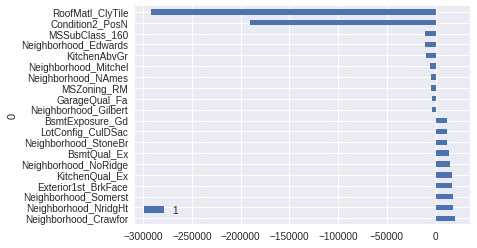

In [259]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

plot_coef(lassocv_raw)

In [257]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
#     top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([bottom_10], axis=0).plot.barh(x = 0, y = 1)

###All above was already provided###

#### Plot your coefficients.

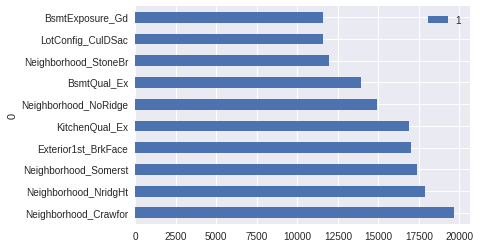

In [256]:
plot_top_model = plot_coef(lassocv_raw)

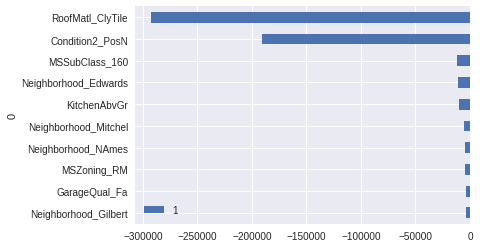

In [258]:
plot_bottom_model = plot_coef(lassocv_raw)

#### Which features add / take away most value from a home?

I split the function into two separate graphs for clarity and readibility.

The features which seem to add value to a home are neighborhood features, namely Crawford, Northridge Heights, and Somerset.

From a negative perspective, we have 2 features which tested very negatively.  Those features are Roof Material (Clay & Tile) and Condition2 (located near a park / greenway).  I beleive these are dummy variables.  To expand on this, we know that these are categorical features and the "negative" correlation could be a high predictor, when the absolute value is taken.

In comparing these results to the unique categorical histograms above, I am seeing some confusion with how some of these predictors correlate to the mean 'SalePrice'.  For instance, "Condition2-PosN', which means located next to a greenway or park, has a high mean 'SalePrice', the opposite of what the above graphs appear to represent.  I'm skeptical because these values seem lik

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)